In [5]:
%load_ext zipline

In [1]:
# zipline 
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol

# date and time zone libraries
from datetime import datetime
import pytz

# visualization
import matplotlib.pyplot as plt


In [2]:
def initialize(context):
    context.stock = symbol('AAPL')
    context.index_average_window = 100
    

In [4]:
def handle_data(context, data):
    # Request history for stock (in context)
    equities_hist = data.history(context.stock, "close", context.index_average_window, "1d")

    # Check if the price is higher than the moving average
    if equities_hist[-1] > equities_hist.mean():
        stock_weight = 1.0
    else:
        stock_weight = 0.0

    # Place order
    order_target_percent(context.stock, stock_weight)


In [5]:
def analyze(context, perf):
    fig = plt.figure(figsize=(12,8))

    # First Chart
    ax = fig.add_subplot(311)
    ax.semilogy(perf['portfolio_value'], linestyle='-', label="Equity Curve", linewidth=3.0)
    ax.legend()
    ax.grid(False)

    # Second Chart
    ax = fig.add_subplot(312)
    ax.plot(perf['gross_leverage'], linestyle='-', label="Exposure", linewidth=1.0)
    ax.legend()
    ax.grid(True)

    # Third Chart
     # Second Chart
    ax = fig.add_subplot(313)
    ax.plot(perf['returns'], linestyle='-.', label="Returns", linewidth=1.0)
    ax.legend()
    ax.grid(True)
    

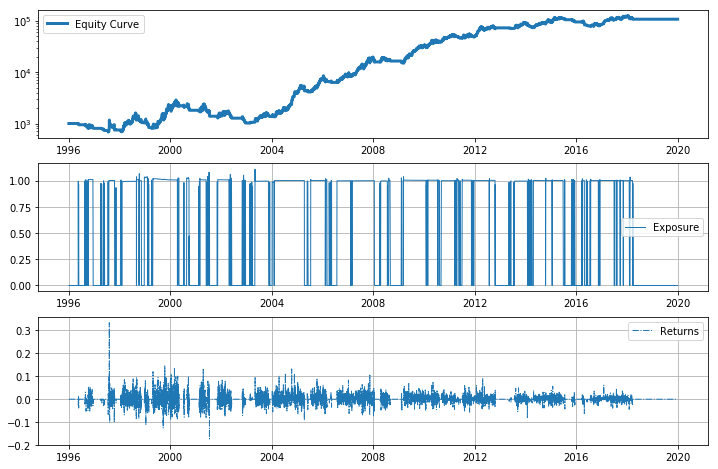

In [6]:
start_date = datetime(1996, 1, 1, tzinfo=pytz.UTC)
end_date = datetime(2019, 12, 31, tzinfo=pytz.UTC)

results = run_algorithm(
    start=start_date,
    end=end_date,
    initialize=initialize,
    analyze=analyze,
    handle_data=handle_data,
    capital_base=1000,
    data_frequency='daily',
    bundle='quandl'
)